# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

### Develpoment: parallel GA searches of the optimal path

We summarize in a table the parameters we use to solve the TSP:

<table>
    <tr>
        <td> $N_{node}$ </td> <td> 8 </td>
    </tr>
    <tr>
        <td> $N_{ind}$ </td> <td> 100 </td>
    </tr>
    <tr>
        <td> $N_{gen}$ </td> <td> 500 </td>
    </tr>
    <tr>
        <td> $N_{migr}$ </td> <td> 10 </td>
    </tr>
    <tr>
        <td> $N_{cut}$ </td> <td> $N_{ind} / 10$ </td>
    </tr>
</table>

- **$N_{node}$**: number of nodes involved in the process
- **$N_{ind}$**: number of individuals (population dimension)
- **$N_{gen}$**: number of generations
- **$N_{migr}$**: number of generations after which the continents exchange their best individuals
- **$N_{cut}$**: number of the best individuals to mutate and exchange between the continents

We report below a picture of the best paths $L_{i}^{(2)}$ and of $\langle L_{i}^{(2)}\rangle$ (averaged on the best half of the population), for each node $i=0,...,7$, as a function of the generations.

We compare these two curves with $L_{best}^{(2)}$, which represents the curve of the best path among all the nodes in each generation.

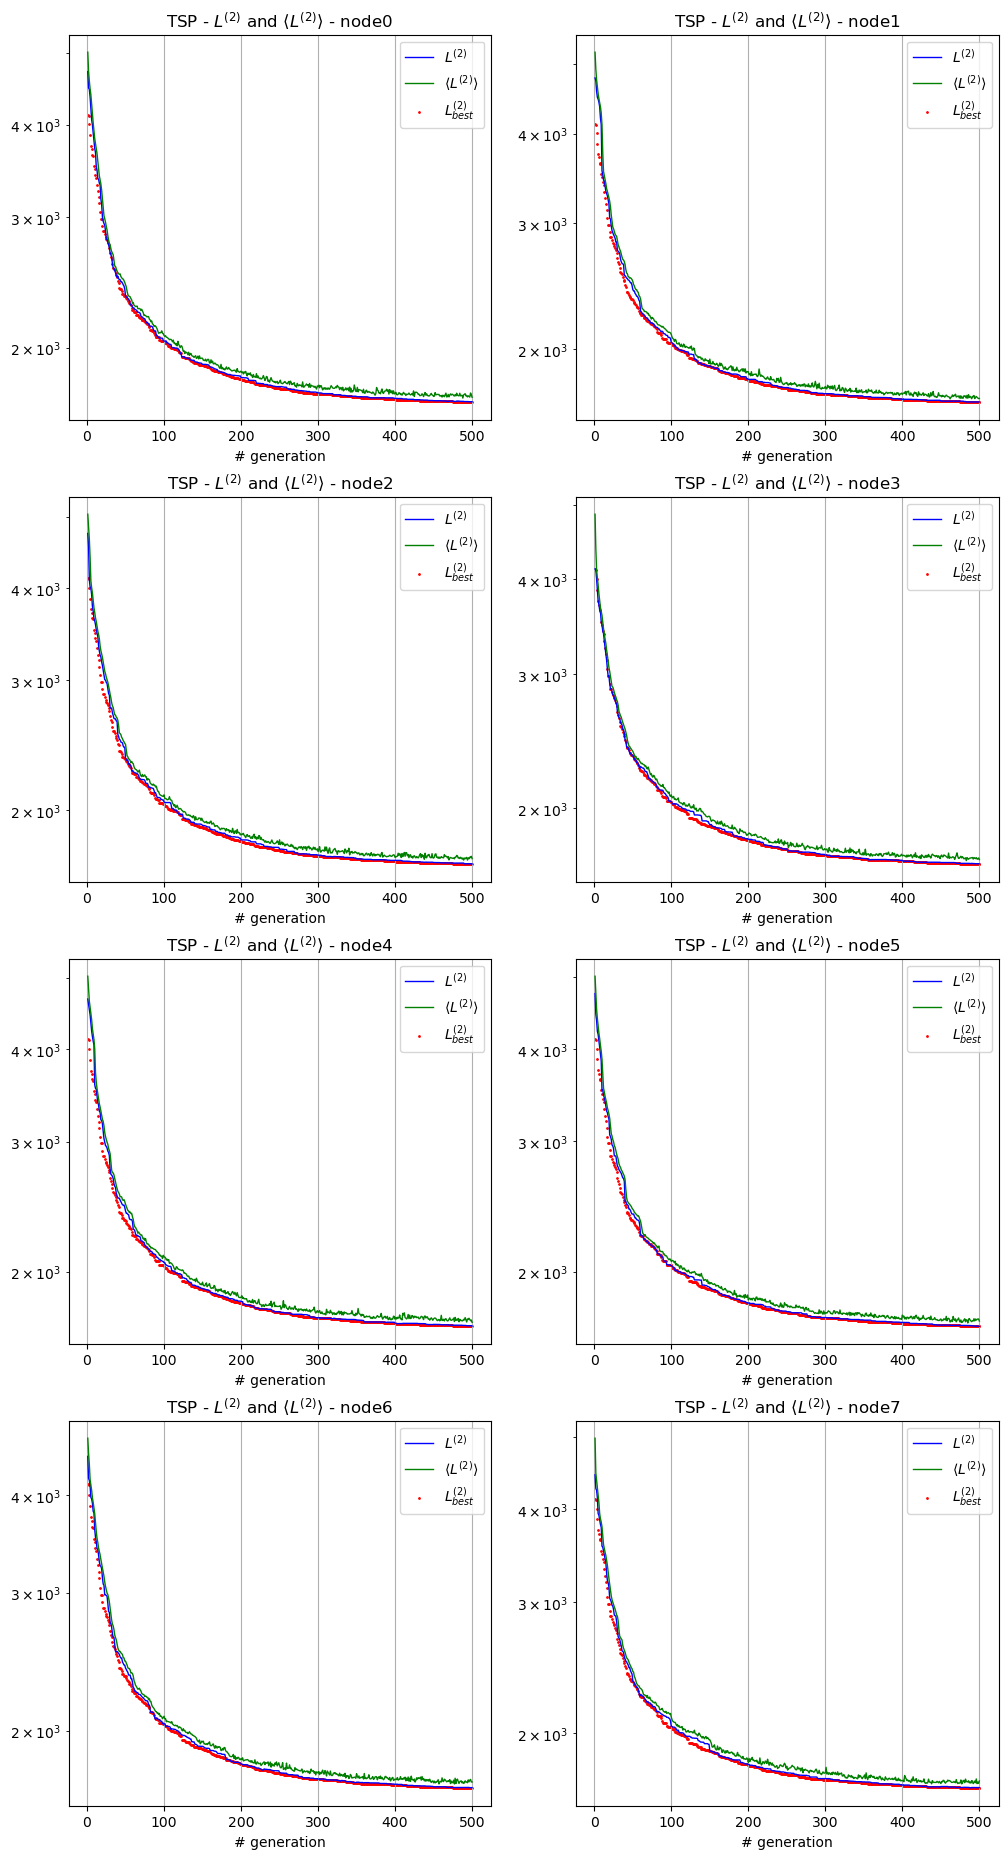

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv

Lbest = np.loadtxt("results/Lbest.out")

fig, plts = plt.subplots(4, 2, figsize=(12, 23))

count = 0

for i in range(4):
    for j in range(2):
        gen = []
        L = []
        Lmean = []
        with open('results/L_proc'+str(count)+'.out', 'r') as file:
            reader = csv.reader(file)
            next(reader, None) # salta la prima riga
            for list in file:
                elements = list.split()
                gen.append(float(elements[0]))
                L.append(float(elements[1]))
                Lmean.append(float(elements[2]))
        file.close()

        plts[i,j].plot(gen, L,linewidth=1,color='blue',label=r'$L^{(2)}$')
        plts[i,j].plot(gen, Lmean,linewidth=1,color='green',label=r'$\langle L^{(2)} \rangle$')
        plts[i,j].scatter(gen,Lbest,color='red',s=1,label=r'$L_{best}^{(2)}$')
        plts[i,j].set_xlabel('# generation')
        plts[i,j].set_title(r'TSP - $L^{(2)}$ and $\langle L^{(2)}\rangle$ - node'+str(count))
        plts[i,j].grid(True)
        plts[i,j].legend()
        plts[i,j].set_yscale('log')

        count += 1

plt.show()

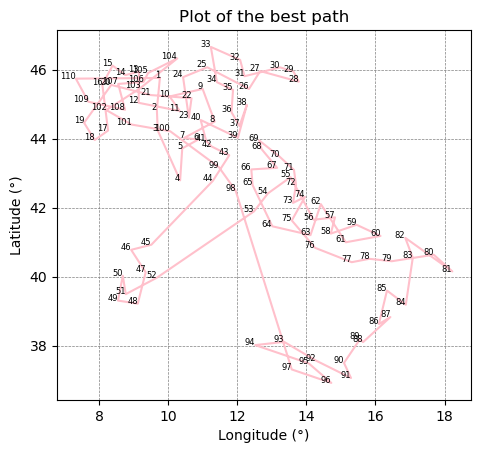

In [32]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('results/best_path.out', 'r') as file:
    reader = csv.reader(file)
    for list in file:
        elements = list.split()
        x.append(float(elements[0]))
        y.append(float(elements[1]))
file.close()

plt.plot(x, y, label='Best path',color='pink')
plt.gca().set_aspect('equal', adjustable='box')  # Assicura che gli assi siano uguali
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('Plot of the best path')


for i in range(len(x)-1):
    plt.text(x[i], y[i], str(i+1), fontsize=6, ha='right')

plt.show()

We can also compare the results shown above with those obtain with independent GA searches (without exchange the best individuals every $N_{migr}$) $ L^{(2)}_{no \; migr}$ and $\langle L^{(2)}_{no \; migr} \rangle$.

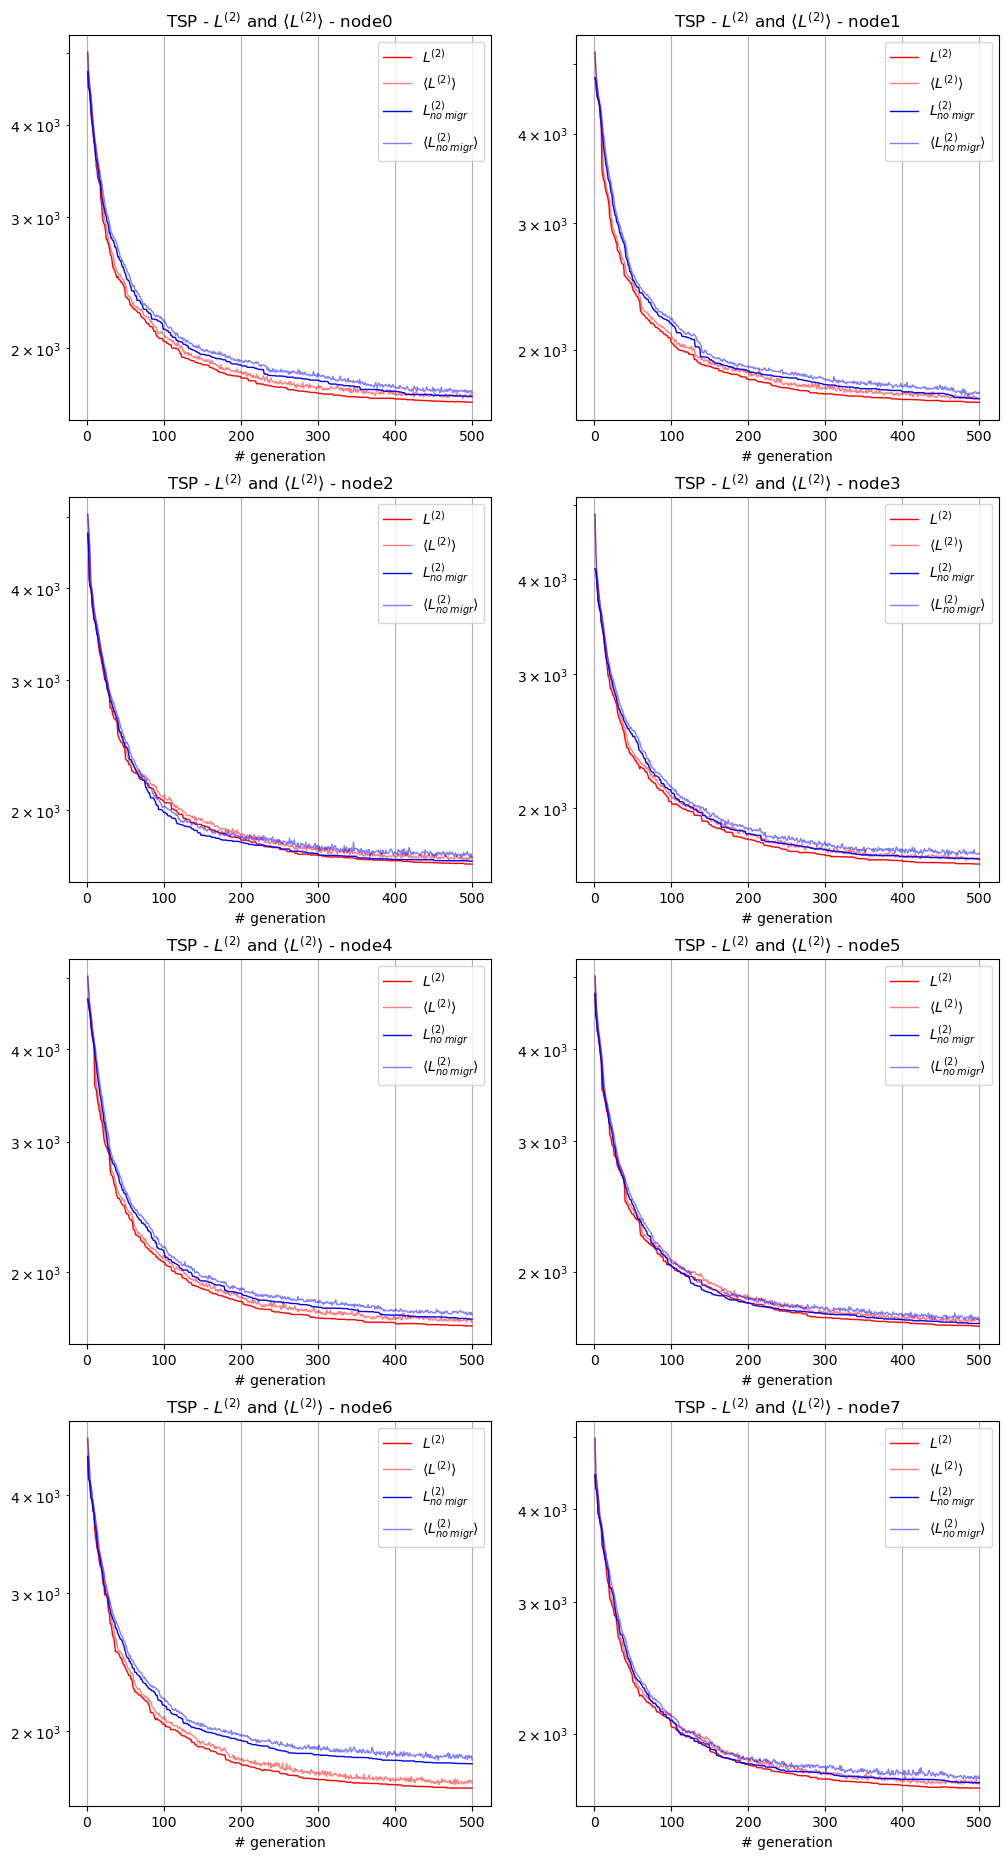

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, plts = plt.subplots(4, 2, figsize=(12, 23))

count = 0

for i in range(4):
    for j in range(2):
        gen = []
        L = []
        Lmean = []
        L_nomigr = []
        Lmean_nomigr = []
        with open('results/L_proc'+str(count)+'.out', 'r') as file:
            reader = csv.reader(file)
            next(reader, None) # salta la prima riga
            for list in file:
                elements = list.split()
                gen.append(float(elements[0]))
                L.append(float(elements[1]))
                Lmean.append(float(elements[2]))
        file.close()
        gen = []
        with open('results/L_proc'+str(count)+'_nomigr.out', 'r') as file:
            reader = csv.reader(file)
            next(reader, None) # salta la prima riga
            for list in file:
                elements = list.split()
                gen.append(float(elements[0]))
                L_nomigr.append(float(elements[1]))
                Lmean_nomigr.append(float(elements[2]))
        file.close()

        plts[i,j].plot(gen, L,linewidth=1,color='red',label=r'$L^{(2)}$')
        plts[i,j].plot(gen, Lmean,linewidth=1,color='red',alpha=0.5,label=r'$\langle L^{(2)} \rangle$')
        plts[i,j].plot(gen, L_nomigr,linewidth=1,color='blue',label=r'$ L^{(2)}_{no \; migr}$')
        plts[i,j].plot(gen, Lmean_nomigr,linewidth=1,color='blue',alpha=0.5,label=r'$\langle L^{(2)}_{no \; migr} \rangle$')
        plts[i,j].set_xlabel('# generation')
        plts[i,j].set_title(r'TSP - $L^{(2)}$ and $\langle L^{(2)}\rangle$ - node'+str(count))
        plts[i,j].grid(True)
        plts[i,j].legend()
        plts[i,j].set_yscale('log')

        count += 1

plt.show()